In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


In [27]:
data = pd.read_csv(r"C:\wine dataset knn\data no show (patient appointment)\healthcare_noshows_appt.csv")

In [28]:
# Check for missing values
print("Missing values:\n", data.isnull().sum())


Missing values:
 PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
Showed_up         0
Date.diff         0
dtype: int64


In [29]:
# Check data types
print("\nData types:\n", data.dtypes)


Data types:
 PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship          bool
Hipertension         bool
Diabetes             bool
Alcoholism           bool
Handcap              bool
SMS_received         bool
Showed_up            bool
Date.diff           int64
dtype: object


In [30]:

# Check data types
print("\nData types:\n", data.dtypes)
data['ScheduledDay'] = pd.to_datetime(data['ScheduledDay'])
data['AppointmentDay'] = pd.to_datetime(data['AppointmentDay'])
data = data[data['Age'] >= 0]  # Remove invalid negative ages
data['Gender'] = data['Gender'].map({'F': 0, 'M': 1})
data['Scholarship'] = data['Scholarship'].astype(int)
data['Hipertension'] = data['Hipertension'].astype(int)
data['Diabetes'] = data['Diabetes'].astype(int)
data['Alcoholism'] = data['Alcoholism'].astype(int)
data['Handcap'] = data['Handcap'].astype(int)
data['SMS_received'] = data['SMS_received'].astype(int)
data['Showed_up'] = data['Showed_up'].astype(int)
data['WaitingDays'] = (data['AppointmentDay'] - data['ScheduledDay']).dt.days

columns_to_drop = ['PatientId', 'AppointmentID', 'ScheduledDay', 'AppointmentDay']
data_cleaned = data.drop(columns=columns_to_drop)

# Check class balance
print("Class Balance:\n", data_cleaned['Showed_up'].value_counts(normalize=True))

# Splitting features and target
X = data_cleaned.drop(['Showed_up'], axis=1)
X = pd.get_dummies(X, columns=['Neighbourhood'], drop_first=True)  # One-hot encode

y = data_cleaned['Showed_up']

try:
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X, y)
except ValueError as e:
    print(f"Error applying SMOTE: {e}")

# Split into train and test sets
X_train_full,X_test_full, y_train_full, y_test_full = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)



Data types:
 PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship          bool
Hipertension         bool
Diabetes             bool
Alcoholism           bool
Handcap              bool
SMS_received         bool
Showed_up            bool
Date.diff           int64
dtype: object
Class Balance:
 Showed_up
1    0.797359
0    0.202641
Name: proportion, dtype: float64


C:\Users\AYUSHI\AppData\Local\Temp\ipykernel_21876\2019333680.py:3: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['ScheduledDay'] = pd.to_datetime(data['ScheduledDay'])
C:\Users\AYUSHI\AppData\Local\Temp\ipykernel_21876\2019333680.py:4: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['AppointmentDay'] = pd.to_datetime(data['AppointmentDay'])


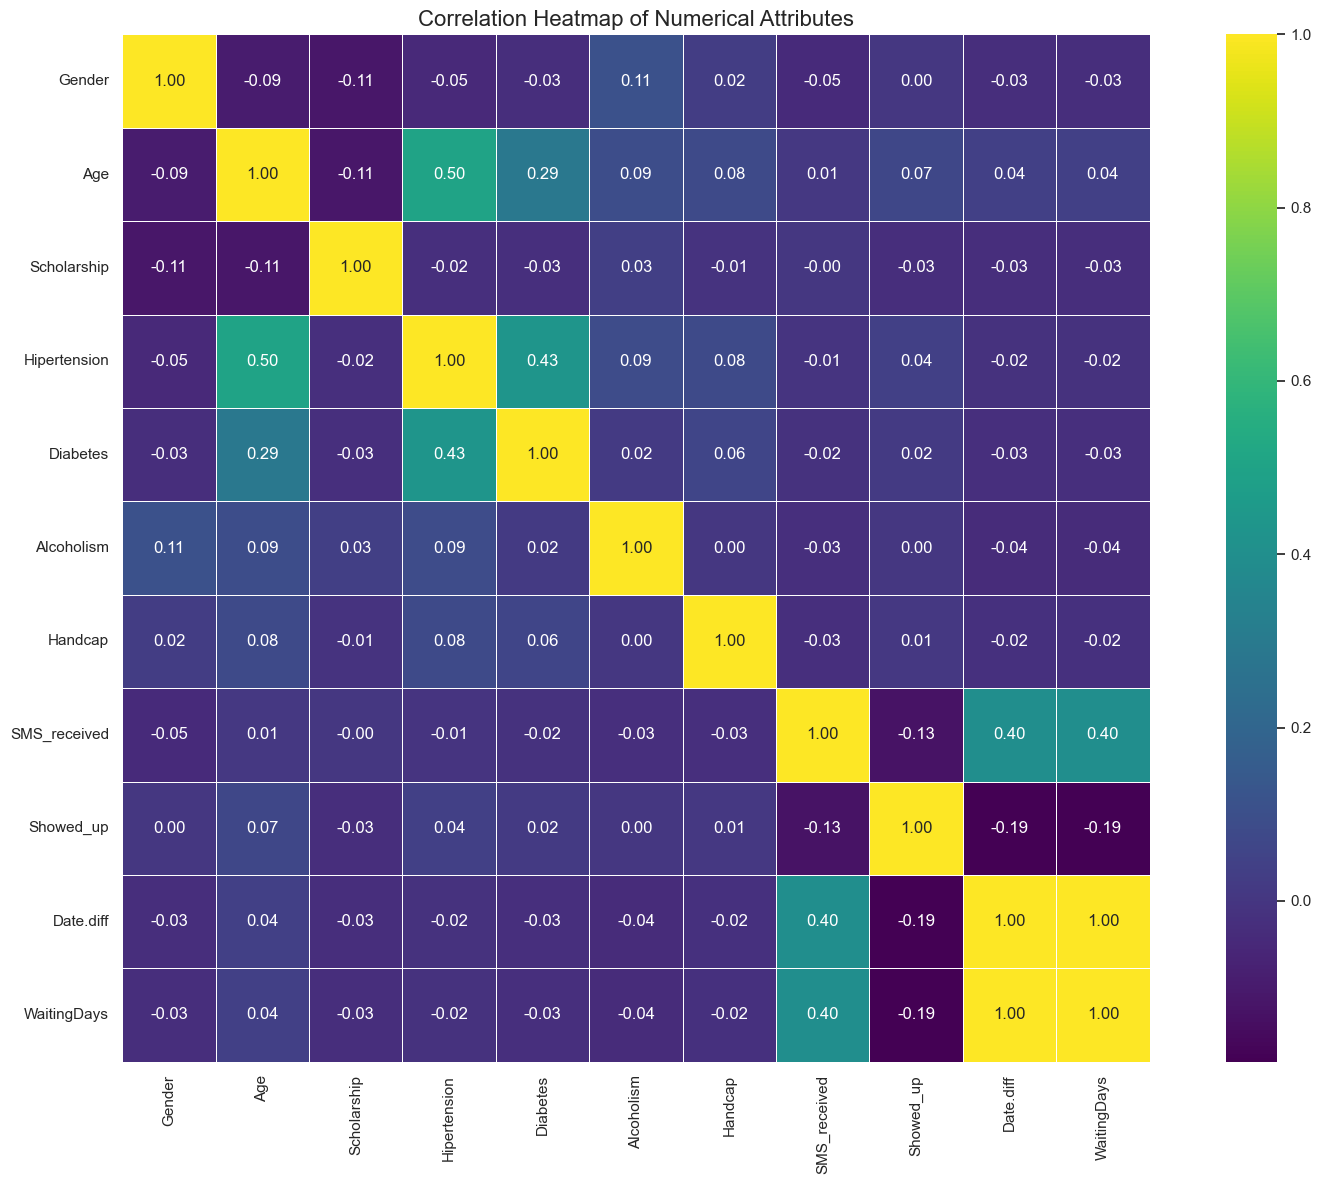

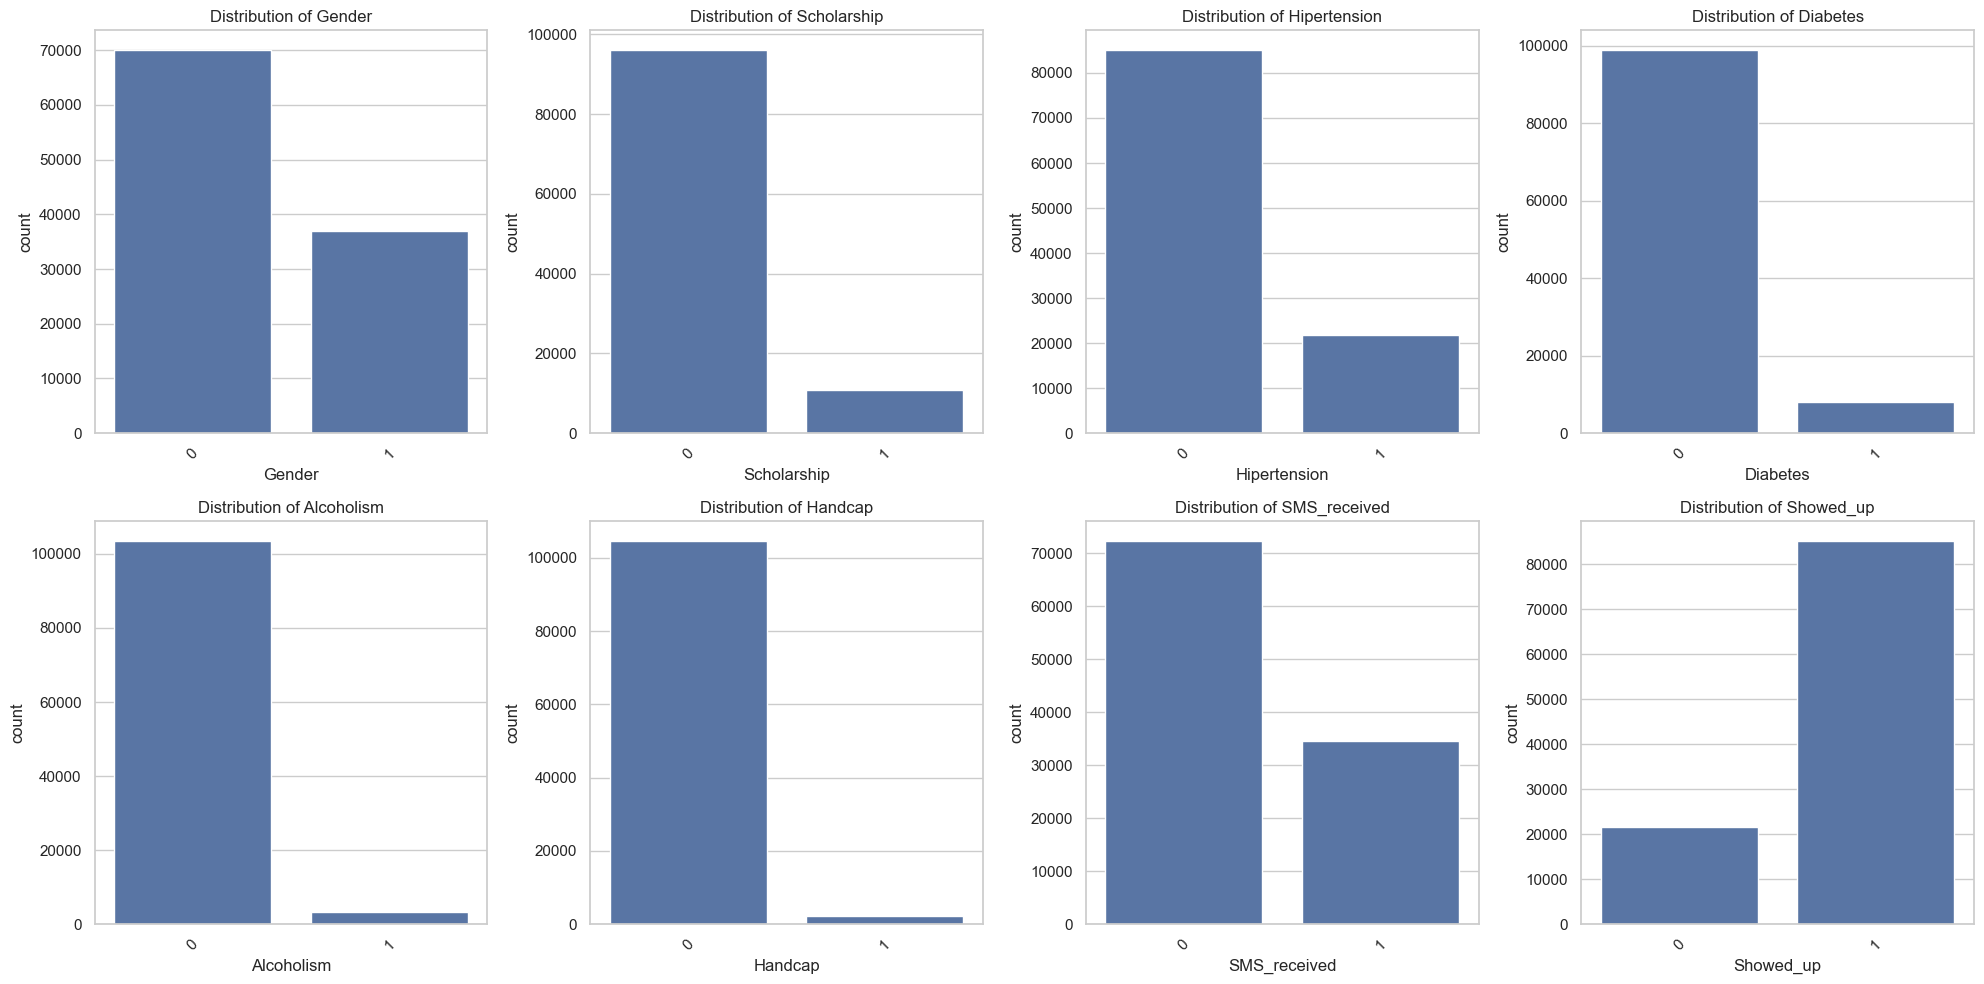

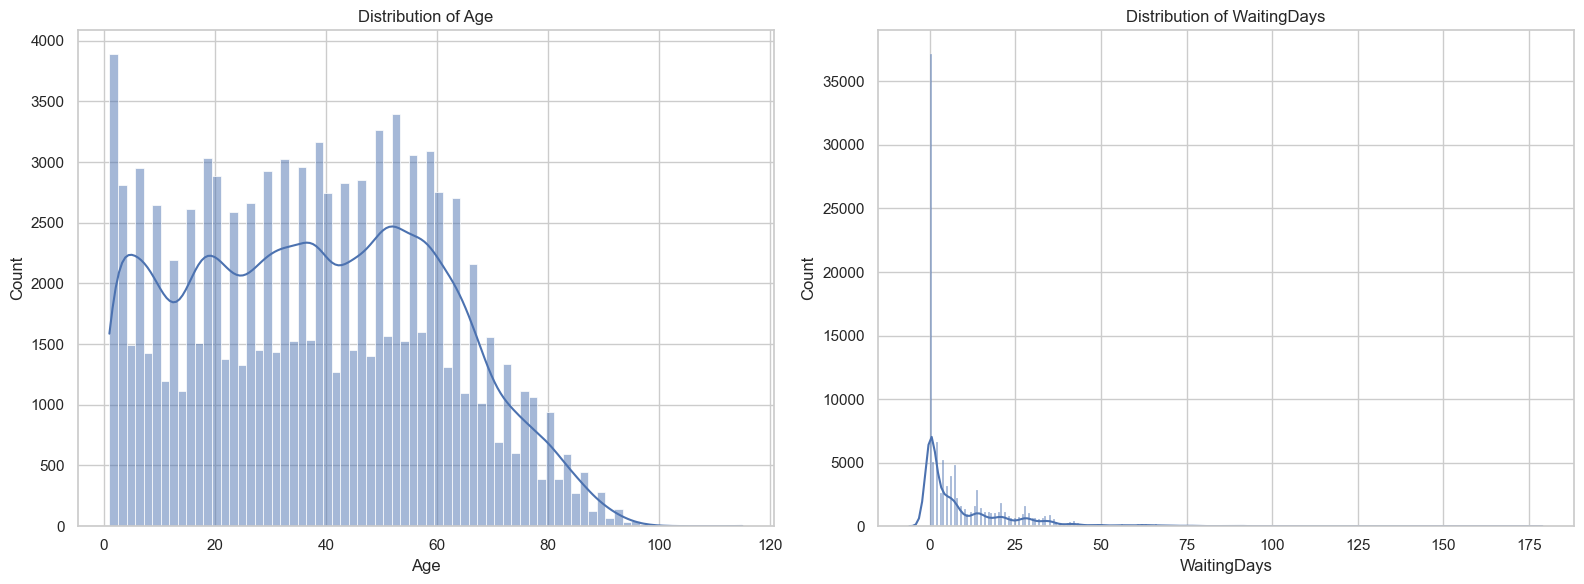

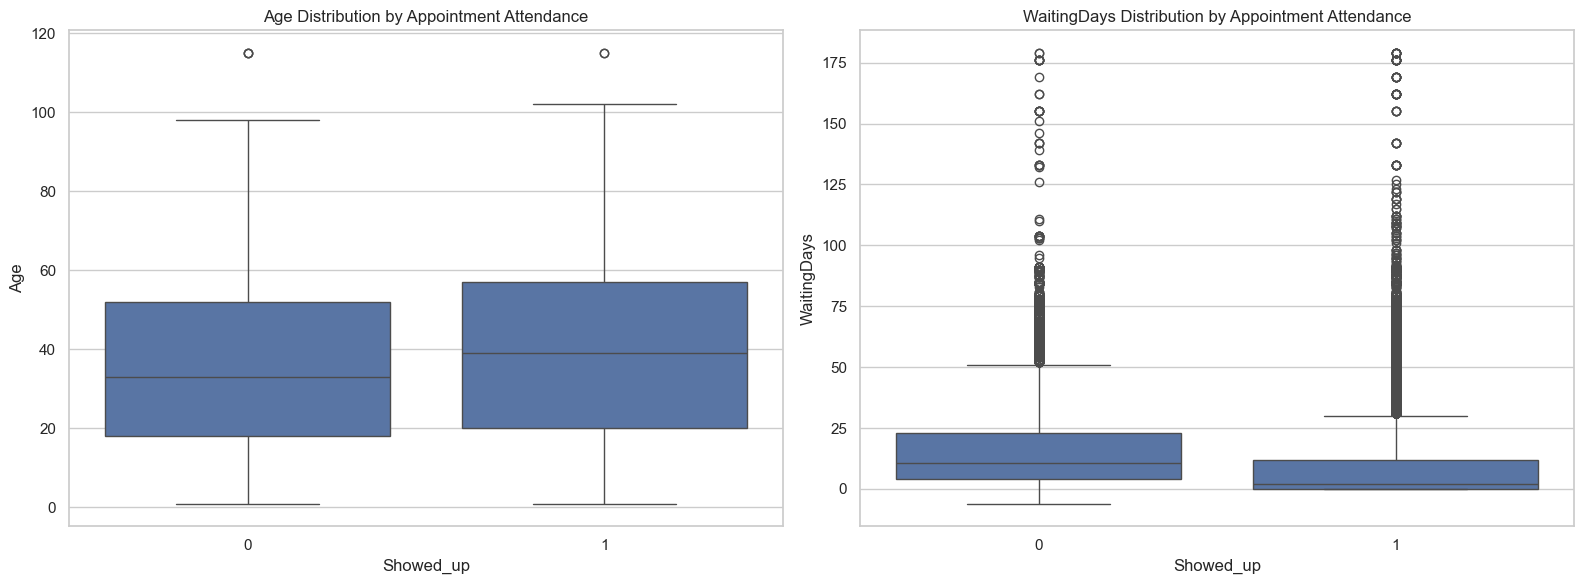

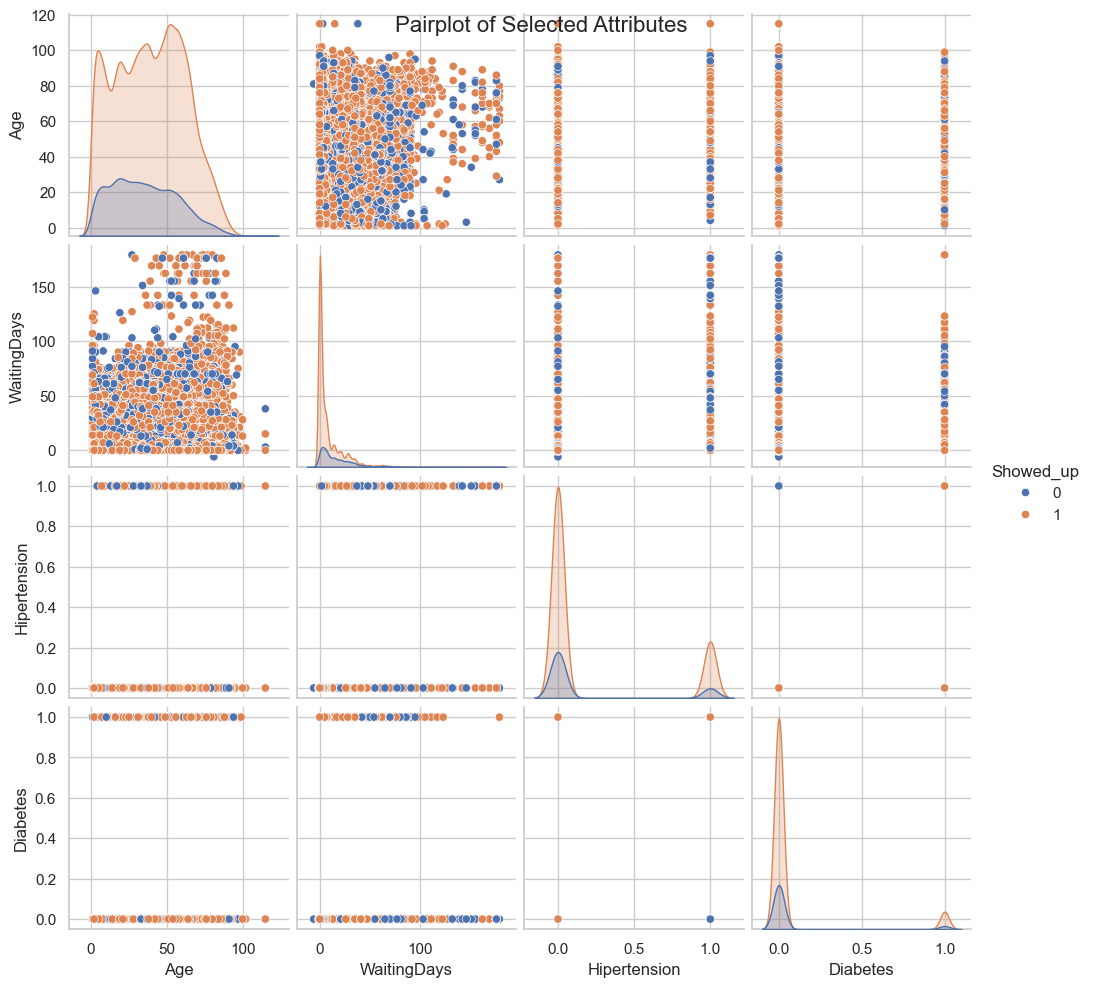

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_correlation_matrix(data):
    """Create a correlation heatmap for numerical attributes."""

    # Select only numerical features for correlation calculation
    numerical_data = data.select_dtypes(include=np.number)

    plt.figure(figsize=(16, 12))
    correlation_matrix = numerical_data.corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='viridis', linewidths=0.5, fmt='.2f', square=True)
    plt.title('Correlation Heatmap of Numerical Attributes', fontsize=16)
    plt.tight_layout()
    plt.show()

def plot_categorical_distributions(data):
    """Create distribution plots for categorical attributes."""
    categorical_cols = ['Gender', 'Scholarship', 'Hipertension', 'Diabetes',
                        'Alcoholism', 'Handcap', 'SMS_received', 'Showed_up']

    fig, axes = plt.subplots(2, 4, figsize=(20, 10))
    axes = axes.ravel()

    for i, col in enumerate(categorical_cols):
        sns.countplot(x=col, data=data, ax=axes[i])
        axes[i].set_title(f'Distribution of {col}', fontsize=12)
        axes[i].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

def plot_numerical_distributions(data):
    """Create distribution plots for numerical attributes."""
    numerical_cols = ['Age', 'WaitingDays']

    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    for i, col in enumerate(numerical_cols):
        sns.histplot(data[col], kde=True, ax=axes[i])
        axes[i].set_title(f'Distribution of {col}', fontsize=12)

    plt.tight_layout()
    plt.show()

def plot_boxplots_by_target(data):
    """Create boxplots of numerical attributes grouped by target variable."""
    numerical_cols = ['Age', 'WaitingDays']

    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    for i, col in enumerate(numerical_cols):
        sns.boxplot(x='Showed_up', y=col, data=data, ax=axes[i])
        axes[i].set_title(f'{col} Distribution by Appointment Attendance', fontsize=12)

    plt.tight_layout()
    plt.show()

def plot_pairplot(data):
    """Create a pairplot for selected numerical attributes."""
    selected_cols = ['Age', 'WaitingDays', 'Hipertension', 'Diabetes', 'Showed_up']
    sns.pairplot(data[selected_cols], hue='Showed_up', diag_kind='kde')
    plt.suptitle('Pairplot of Selected Attributes', fontsize=16)
    plt.show()

def main_visualization(data):
    """Execute all visualization functions."""
    # Correlation Matrix
    plot_correlation_matrix(data)

    # Categorical Distributions
    plot_categorical_distributions(data)

    # Numerical Distributions
    plot_numerical_distributions(data)

    # Boxplots by Target Variable
    plot_boxplots_by_target(data)

    # Pairplot
    plot_pairplot(data)

# Usage
# Assuming 'data_cleaned' is your preprocessed dataframe
main_visualization(data_cleaned)